In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
wine = pd.read_csv("winequality-white.csv", sep=";")
wine["quality"].value_counts()

# poistetaan duplikaatit
wine.drop_duplicates(inplace=True)

In [4]:
colnames = wine.columns
colnames

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
#selittävät muuttujat
X = wine.loc[:, 'fixed acidity':'alcohol']
#vastemuuttuja
Y = wine.loc[:, 'quality']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) #todelliset X ja Y

print(X_train.shape)
print(X_test.shape)

(3168, 11)
(793, 11)


# Mallinnus

In [8]:
from sklearn import tree

classifier = tree.DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [10]:
print(tree.export_text(classifier, feature_names=colnames[:11]))

|--- alcohol <= 10.02
|   |--- volatile acidity <= 0.24
|   |   |--- free sulfur dioxide <= 23.50
|   |   |   |--- class: 6
|   |   |--- free sulfur dioxide >  23.50
|   |   |   |--- class: 6
|   |--- volatile acidity >  0.24
|   |   |--- volatile acidity <= 0.30
|   |   |   |--- class: 5
|   |   |--- volatile acidity >  0.30
|   |   |   |--- class: 5
|--- alcohol >  10.02
|   |--- alcohol <= 11.48
|   |   |--- free sulfur dioxide <= 13.50
|   |   |   |--- class: 5
|   |   |--- free sulfur dioxide >  13.50
|   |   |   |--- class: 6
|   |--- alcohol >  11.48
|   |   |--- alcohol <= 12.55
|   |   |   |--- class: 6
|   |   |--- alcohol >  12.55
|   |   |   |--- class: 7



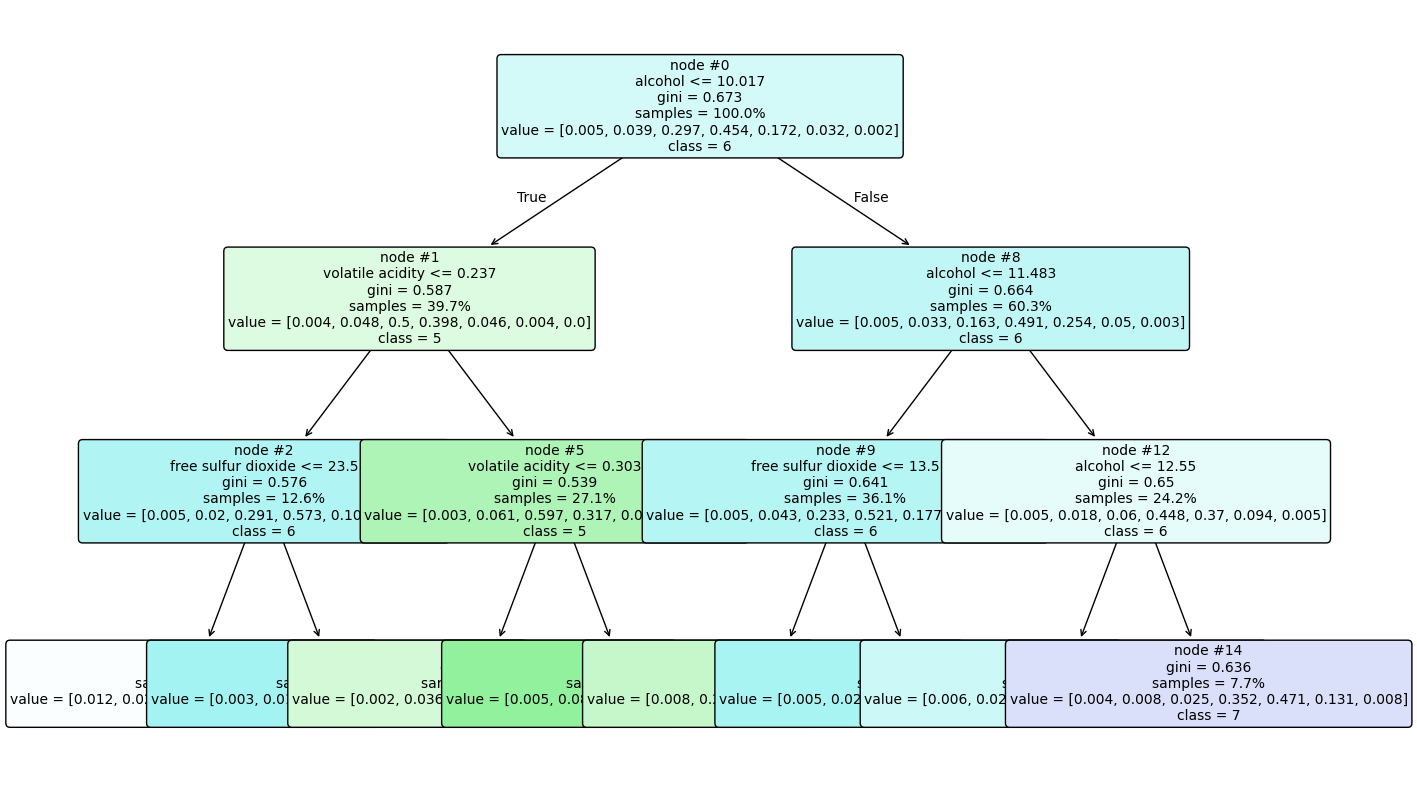

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

# Convert class names to strings
class_names = [str(cls) for cls in classifier.classes_]

tree.plot_tree(classifier, node_ids=True, class_names=class_names, filled=True, proportion=True, rounded=True, feature_names=colnames, fontsize=10)
plt.show()

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [15]:
# lasketaan ennusteet  x_test-joukosta (test_split mallinnusvaiheessa ennen mallinnusta)
Y_pred = classifier.predict(X_test) # ennusteet lasketaan x_test-joukosta

cm = confusion_matrix(Y_test, Y_pred, normalize='all') # verrataan todellisia ennusteeseen
print(f"Sekaannusmatriisi:\n {cm}")

tarkkuus = accuracy_score(Y_test, Y_pred) # verrataan todellisia ennusteeseen

print("\ntarkkuus on laskettu opetusjoukosta = %.3f\n" % (tarkkuus))

print("classification_report: \n")
print(classification_report(Y_test, Y_pred, zero_division=1))


Sekaannusmatriisi:
 [[0.         0.         0.00252207 0.0037831  0.         0.        ]
 [0.         0.         0.02017654 0.01513241 0.00252207 0.        ]
 [0.         0.         0.16015132 0.13114754 0.0037831  0.        ]
 [0.         0.         0.11349306 0.30517024 0.02143758 0.        ]
 [0.         0.         0.00630517 0.13366961 0.04287516 0.        ]
 [0.         0.         0.         0.03026482 0.0075662  0.        ]]

tarkkuus on laskettu opetusjoukosta = 0.508

classification_report: 

              precision    recall  f1-score   support

           3       1.00      0.00      0.00         5
           4       1.00      0.00      0.00        30
           5       0.53      0.54      0.54       234
           6       0.49      0.69      0.58       349
           7       0.55      0.23      0.33       145
           8       1.00      0.00      0.00        30

    accuracy                           0.51       793
   macro avg       0.76      0.25      0.24       793
weight

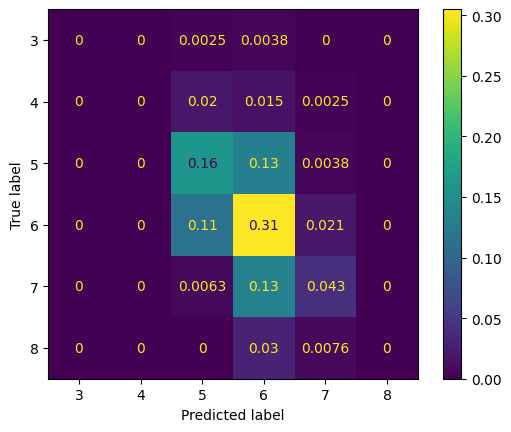

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

# Ensure the number of display labels matches the number of classes
cmd = ConfusionMatrixDisplay(cm, display_labels=sorted(Y_test.unique()))
cmd.plot()
plt.show()

In [30]:
#ristiinvalidointi
"""
Variables:
    classifier: The machine learning model to be evaluated.
    X: Features of the dataset.
    Y: Labels of the dataset.

Functionality:
    - Uses `cross_val_score` to perform 5-fold cross-validation on the provided classifier.
    - Prints the cross-validation scores.

Usage:
    Ensure that `classifier`, `X`, and `Y` are defined before running this script.
"""
from sklearn.model_selection import cross_val_score

#kierrosten määrä
k = 4

scores = cross_val_score(estimator = classifier,
                      X = X,
                      y = Y, 
                      scoring = 'accuracy',
                      cv = k)

print(f"tarkkuudet on laskettu {k} yksittäisellä kierroksella")
print(f"\ntarkkuudet: {scores}")
print(f"\nkierrosten keskiarvo {k} kierroksella = {scores.mean():.3f}")

tarkkuudet on laskettu 4 yksittäisellä kierroksella

tarkkuudet: [0.4752775  0.4969697  0.5010101  0.50909091]

kierrosten keskiarvo 4 kierroksella = 0.496
